# Reviewer 2

Question1:
Authors mention that a severe phenotype of patients is associate with younger onset of the age. Symptoms include both syncope and sudden cardiac arrest. Are there any differences in the age of onset between syncope and sudden cardiac arrest?


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from analysis.database import get_config

config = get_config()

Authors mention that a severe phenotype of patients is associate with younger onset of the age. Symptoms include both syncope and sudden cardiac arrest. 
Are there any differences in the age of onset between syncope and sudden cardiac arrest?


In [3]:
data = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx")

data.head()


,Unnamed: 0,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# print columns that have "Exercise/stress induced" in their name
# for col in data.columns:
#     if "Exercise" in col or "Effort" in col:
#         print(col)

In [5]:
fig_dir = Path.cwd().parent / "figures" / "reviewer2" / "question1"

if not fig_dir.exists():
    fig_dir.mkdir(parents=True)
    print("Created directory:", fig_dir)
else:
    print("Directory exists:", fig_dir)

Directory exists: /Users/ac4294/dev/2024/cpvt_database_analysis/figures/reviewer2/question1


In [6]:
data_sel = data[
    ["individual_id", "Catecholaminergic polymorphic ventricular tachycardia 1",
     "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
     "Syncope",
     "Sudden cardiac arrest",
     "Sudden cardiac death",
     "Polymorphic ventricular tachycardia",
     "Exercise/stress induced sudden cardiac arrest",
     "Exercise/stress induced polymorphic ventricular tachycardia",
     "Syncope exercise/stress induced",
     ]]

data_sel.head()

,individual_id,Catecholaminergic polymorphic ventricular tachycardia 1,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,Exercise/stress induced sudden cardiac arrest,Exercise/stress induced polymorphic ventricular tachycardia,Syncope exercise/stress induced
0,1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,2,1.0,NaN,0.0,0.0,NaN,1.0,NaN,1.0,NaN
2,3,1.0,NaN,1.0,0.0,NaN,1.0,NaN,1.0,1.0
3,4,1.0,2.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN
4,5,1.0,10.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
data_sel[
    "Catecholaminergic polymorphic ventricular tachycardia 1"].value_counts()

Catecholaminergic polymorphic ventricular tachycardia 1
1.0    965
Name: count, dtype: int64

In [8]:
num_nan = data_sel[
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].isna().sum()
num_non_nan = len(data_sel) - num_nan

print(f"Number of NaN values: {num_nan}")
print(f"Number of non-NaN values: {num_non_nan}")

Number of NaN values: 934
Number of non-NaN values: 409


In [9]:
print(len(data_sel["individual_id"].unique()))

1342


In [10]:
# get only cpvt patients
print(len(data_sel))

data_sel = data_sel[
    data_sel["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1]
# make unique ids
data_sel = data_sel.drop_duplicates(subset="individual_id")

len(data)

1343


1343

In [11]:
# plot age of onset for syncope and sudden cardiac arrest
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def get_data_df(df_org: pd.DataFrame, col: str):
    df = df_org[[col,
                 "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"]].copy()
    df.columns = [col, "Age of onset"]
    df[col] = df[col].apply(
        lambda x: "Yes" if x == 1 else "No" if x == 0 else "null")
    return df


df_stat3 = get_data_df(data_sel, "Sudden cardiac death")
df_stat3["Sudden cardiac death"].value_counts()

Sudden cardiac death
null    964
Name: count, dtype: int64

In [13]:
# data_sync = data[[
#     "Syncope",
#     "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
# ]].copy()
# # rename columns
# data_sync.columns = [
#     "Syncope_pre",
#      "Age of onset"
# ]
# data_sync["Syncope"] = data_sync["Syncope_pre"].apply(lambda x: "Yes" if x == 1 else "No" if x == 0 else "null")
# data_sync["Syncope"].value_counts()
data_sync = get_data_df(data_sel, "Syncope")
data_sync["Syncope"].value_counts()

Syncope
Yes     387
null    339
No      238
Name: count, dtype: int64

In [14]:
sns.set_style("ticks")

DEFAULT_COLOR = sns.color_palette("husl", 9)[6]


def make_boxplot(df: pd.DataFrame, *, x: str, y: str = "Age of onset",
                 output_file: str, title: str = None, x_label: str = None):
    with plt.rc_context({
        "font.size": 16,
        "figure.figsize": (6, 6),
    }):
        order = ["Yes", "No"]
        sns.boxplot(
            data=df[df[x] != "null"],
            x=x,
            y=y,
            fliersize=0,
            hue=x,
            order=order,
            hue_order=order
        )
        sns.stripplot(
            data=df[df[x] != "null"],
            x=x,
            y=y,
            color="black",
            size=2,
            order=order
        )

        if title:
            plt.title(title)
        else:
            plt.title(f"Age of onset vs\nIncidence of {x}")

        if x_label:
            plt.xlabel(x_label)

        plt.tight_layout()
        plt.savefig(fig_dir / output_file)
        plt.show()

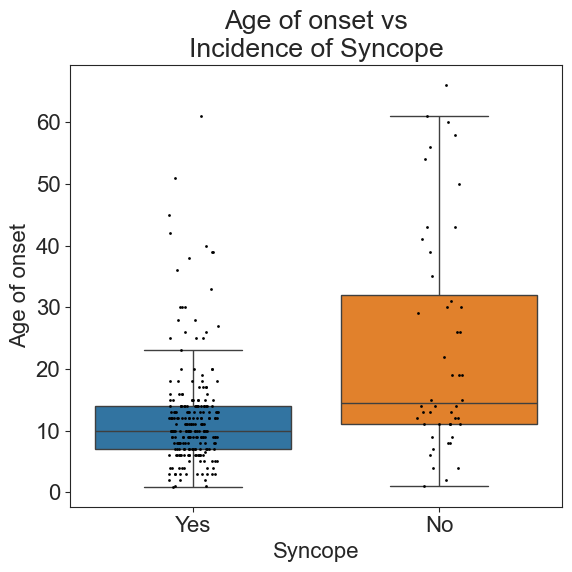

In [15]:
make_boxplot(data_sync, x="Syncope",
             output_file="reviewer2.question1.age_vs_syncope.pdf")

In [16]:
from scipy.stats import mannwhitneyu


def get_stats(df_stat: pd.DataFrame, col: str):
    df_no = df_stat[df_stat[col] == "No"][["Age of onset"]].dropna()
    df_yes = df_stat[df_stat[col] == "Yes"][["Age of onset"]].dropna()

    _, p = mannwhitneyu(df_no["Age of onset"], df_yes["Age of onset"])

    print("Mann Whitney U test for", col)
    print(f"p value: {p:.10f}")

    # median and iqr
    for choice in ["No", "Yes"]:
        df_pick = df_stat[df_stat[col] == choice][["Age of onset"]].dropna()

        median = df_pick.median()
        q1 = df_pick.quantile(0.25)
        q3 = df_pick.quantile(0.75)

        print(
            f"Group: {choice} Median: {median.iloc[0]}, IQR: {q1.iloc[0]}-{q3.iloc[0]} ({q3.iloc[0] - q1.iloc[0]}) (n={len(df_pick)})")


get_stats(data_sync, "Syncope")


Mann Whitney U test for Syncope
p value: 0.0000164867
Group: No Median: 14.5, IQR: 11.0-32.0 (21.0) (n=48)
Group: Yes Median: 10.0, IQR: 7.0-14.0 (7.0) (n=234)


In [17]:
# age of onset for sudden cardiac arrest
data_sync2 = data[[
    "Sudden cardiac arrest",
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
]].copy()
# rename columns
data_sync2.columns = [
    "Sudden cardiac arrest_pre",
    "Age of onset"
]
data_sync2["Sudden cardiac arrest"] = data_sync2[
    "Sudden cardiac arrest_pre"].apply(
    lambda x: "Yes" if x == 1 else "No" if x == 0 else "null")
data_sync2["Sudden cardiac arrest"].value_counts()

Sudden cardiac arrest
No      650
Yes     357
null    336
Name: count, dtype: int64

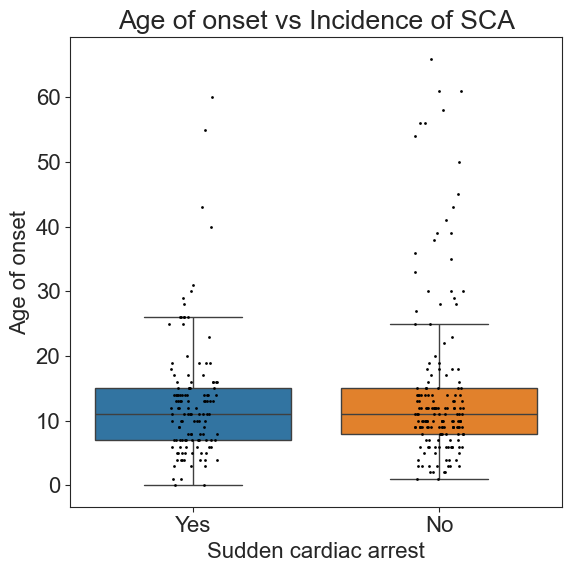

In [18]:
# sns.boxplot(
#     data=data_sync2[data_sync2["Sudden cardiac arrest"] != "null"],
#     x="Sudden cardiac arrest",
#     y="Age of onset",
#     fliersize=0
# )
# sns.stripplot(
#     data=data_sync2[data_sync2["Sudden cardiac arrest"] != "null"],
#     x="Sudden cardiac arrest",
#     y="Age of onset",
#     color="black",
#     size=2
# )
# 
# plt.savefig(fig_dir / "reviewer2.question1.age_vs_sudden_cardiac_arrest.png")

make_boxplot(data_sync2, x="Sudden cardiac arrest",
             output_file="reviewer2.question1.age_vs_sudden_cardiac_arrest.pdf",
             title="Age of onset vs Incidence of SCA")

In [19]:
# Mann WHitney / Wilcoxon rank sum test
from scipy.stats import mannwhitneyu

In [20]:
get_stats(data_sync2, "Sudden cardiac arrest")

Mann Whitney U test for Sudden cardiac arrest
p value: 0.9121867493
Group: No Median: 11.0, IQR: 8.0-15.0 (7.0) (n=171)
Group: Yes Median: 11.0, IQR: 7.0-15.0 (8.0) (n=127)


In [21]:
data_stat3 = get_data_df(data_sel, "Polymorphic ventricular tachycardia")
data_stat3["Polymorphic ventricular tachycardia"].value_counts()

Polymorphic ventricular tachycardia
Yes     411
null    389
No      164
Name: count, dtype: int64

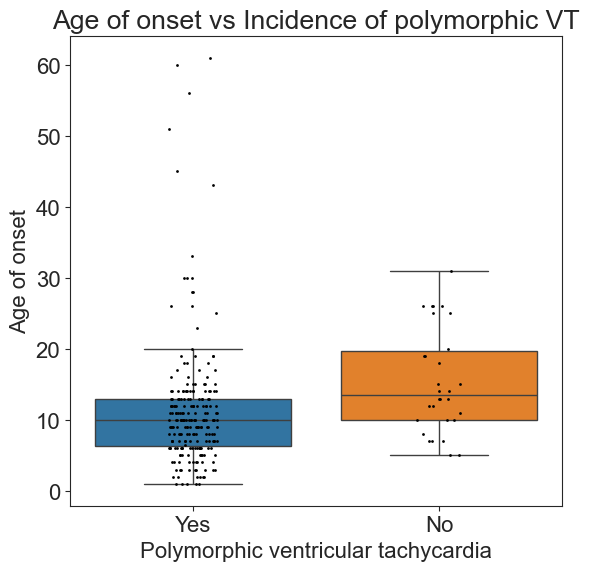

In [22]:
make_boxplot(data_stat3, x="Polymorphic ventricular tachycardia",
             title="Age of onset vs Incidence of polymorphic VT",
             output_file="reviewer2.question1.age_vs_polymorphic_ventricular_tachycardia.pdf")

In [23]:
get_stats(data_stat3, "Polymorphic ventricular tachycardia")

Mann Whitney U test for Polymorphic ventricular tachycardia
p value: 0.0005781095
Group: No Median: 13.5, IQR: 10.0-19.75 (9.75) (n=30)
Group: Yes Median: 10.0, IQR: 6.375-13.0 (6.625) (n=224)


# Exercise Induced

In [24]:
data_stat4 = get_data_df(data_sel,
                         "Exercise/stress induced sudden cardiac arrest")
data_stat4["Exercise/stress induced sudden cardiac arrest"].value_counts()

Exercise/stress induced sudden cardiac arrest
null    851
Yes      97
No       16
Name: count, dtype: int64

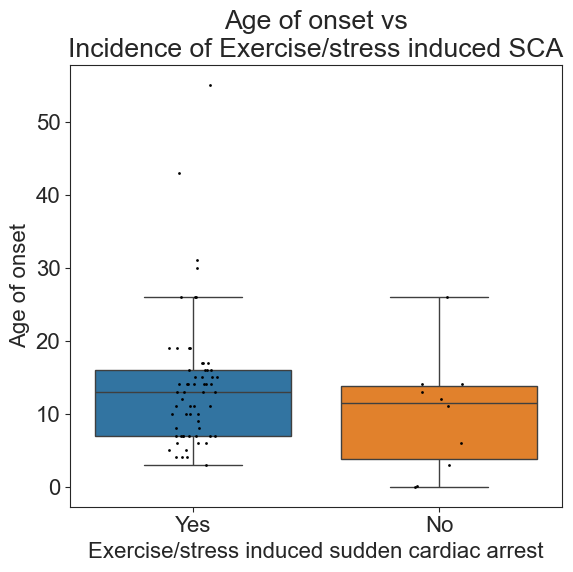

In [25]:
make_boxplot(data_stat4, x="Exercise/stress induced sudden cardiac arrest",
             output_file="reviewer2.question1.age_vs_exercise_stress_induced_sudden_cardiac_arrest.png",
             title="Age of onset vs\nIncidence of Exercise/stress induced SCA")

In [26]:
get_stats(data_stat4, "Exercise/stress induced sudden cardiac arrest")

Mann Whitney U test for Exercise/stress induced sudden cardiac arrest
p value: 0.1579300171
Group: No Median: 11.5, IQR: 3.75-13.75 (10.0) (n=10)
Group: Yes Median: 13.0, IQR: 7.0-16.0 (9.0) (n=62)


In [27]:
data_stat5 = get_data_df(data_sel,
                         "Exercise/stress induced polymorphic ventricular tachycardia")
data_stat5[
    "Exercise/stress induced polymorphic ventricular tachycardia"].value_counts()

Exercise/stress induced polymorphic ventricular tachycardia
null    643
Yes     315
No        6
Name: count, dtype: int64

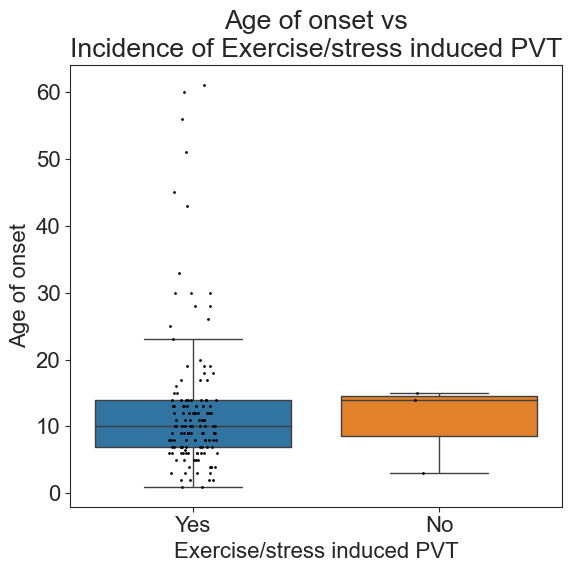

In [28]:
make_boxplot(data_stat5,
             x="Exercise/stress induced polymorphic ventricular tachycardia",
             title="Age of onset vs\nIncidence of Exercise/stress induced PVT",
             output_file="reviewer2.question1.age_vs_exercise_stress_induced_polymorphic_ventricular_tachycardia.png",
             x_label="Exercise/stress induced PVT")

In [29]:
get_stats(data_stat5,
          "Exercise/stress induced polymorphic ventricular tachycardia")

Mann Whitney U test for Exercise/stress induced polymorphic ventricular tachycardia
p value: 0.7856640135
Group: No Median: 14.0, IQR: 8.5-14.5 (6.0) (n=3)
Group: Yes Median: 10.0, IQR: 7.0-14.0 (7.0) (n=138)


In [30]:
data_stat6 = get_data_df(data_sel, "Syncope exercise/stress induced")
data_stat6["Syncope exercise/stress induced"].value_counts()

Syncope exercise/stress induced
null    694
Yes     261
No        9
Name: count, dtype: int64

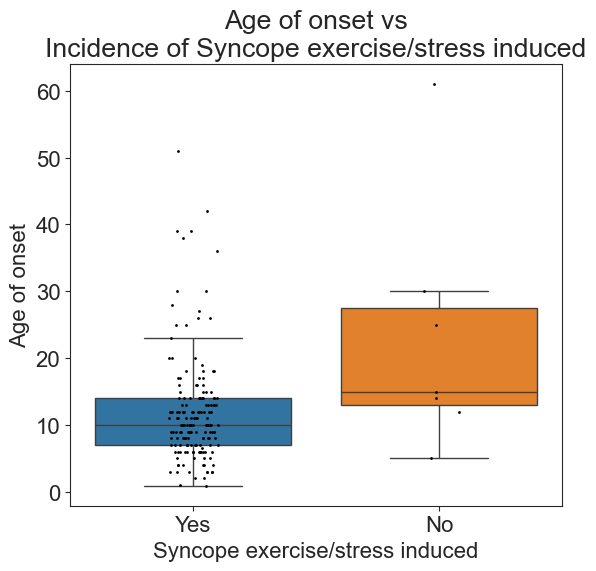

In [31]:
make_boxplot(data_stat6, x="Syncope exercise/stress induced",
             output_file="reviewer2.question1.age_vs_syncope_exercise_stress_induced.png")

In [32]:
get_stats(data_stat6, "Syncope exercise/stress induced")

Mann Whitney U test for Syncope exercise/stress induced
p value: 0.0298354406
Group: No Median: 15.0, IQR: 13.0-27.5 (14.5) (n=7)
Group: Yes Median: 10.0, IQR: 7.0-14.0 (7.0) (n=170)


# See Syncope and Sudden Cardiac Arrest

It was pointed out that even in patients who reported syncope - they may have had sudden cardiac arrest, but it was reported
as syncope since they fainted.

In [33]:
data_sny_sca = data_sel[[
    "individual_id",
    "Syncope",
    "Sudden cardiac arrest"
]].copy()
data_sny_sca.drop_duplicates(subset="individual_id", inplace=True)

data_sny_sca = data_sny_sca[
    data_sny_sca["Syncope"].notna() & data_sny_sca[
        "Sudden cardiac arrest"].notna()
    ]

print(data_sny_sca.shape)
data_sny_sca = data_sny_sca.map(lambda x: "Yes" if x == 1 else "No")

data_sny_sca.head()

(534, 3)


,individual_id,Syncope,Sudden cardiac arrest
1,No,No,No
2,No,Yes,No
3,No,No,No
4,No,Yes,No
27,No,No,No


In [34]:
data_sny_sca["Syncope"].value_counts()

Syncope
Yes    297
No     237
Name: count, dtype: int64

In [35]:
data_sny_sca["Sudden cardiac arrest"].value_counts()

Sudden cardiac arrest
No     414
Yes    120
Name: count, dtype: int64

In [36]:
# create Contingency table
sca_vs_syncope = pd.crosstab(data_sny_sca["Syncope"],
                             data_sny_sca["Sudden cardiac arrest"])
sca_vs_syncope = sca_vs_syncope.rename(
    columns={
        "No": "No Sudden Cardiac Arrest",
        "Yes": "Sudden Cardiac Arrest"
    },
    index={
        "No": "No Syncope",
        "Yes": "Syncope"
    },
)
# remove levels
sca_vs_syncope.columns.name = None
sca_vs_syncope.index.name = "Syncope / Sudden Cardiac Arrest"

sca_vs_syncope.to_csv(Path.cwd().parent / "data" / "fisher_sca_vs_syncope.csv")

sca_vs_syncope

,No Sudden Cardiac Arrest,Sudden Cardiac Arrest
Syncope / Sudden Cardiac Arrest,,
No Syncope,183,54
Syncope,231,66


In [37]:
sca_vs_syncope["No Sudden Cardiac Arrest"].sum()

414

In [38]:
sca_vs_syncope["Sudden Cardiac Arrest"].sum()

120

In [39]:
from scipy.stats import fisher_exact, chi2_contingency

oddsratio, pvalue = fisher_exact(sca_vs_syncope)

print("Odds ratio (F):", oddsratio)
print("p-value (F):", pvalue)

chi2, p, dof, ex = chi2_contingency(sca_vs_syncope)

print("Chi2:", chi2)
print("p-value (Chi2):", p)


Odds ratio (F): 0.9682539682539683
p-value (F): 0.917029908365811
Chi2: 0.002541173367627172
p-value (Chi2): 0.9597956260369604


# Syncope vs Sudden Cardiac Arrest

Is there a difference in  age of onset and incidence of combination of syncope and sudden cardiac arrest?

In [40]:
data_sny_sca_age = data_sel[[
    "individual_id",
    "Syncope",
    "Sudden cardiac arrest",
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"
]].copy()
# create groups based on syncope and sudden cardiac arrest (bool add)
data_sny_sca_age["group_ssca"] = data_sny_sca_age["Syncope"] * 2 + \
                                 data_sny_sca_age["Sudden cardiac arrest"]
data_sny_sca_age["group_ssca"] = data_sny_sca_age["group_ssca"].map({
    0: "No Syncope, No Sudden Cardiac Arrest",
    1: "No Syncope, Sudden Cardiac Arrest",
    2: "Syncope, No Sudden Cardiac Arrest",
    3: "Syncope, Sudden Cardiac Arrest"
})

data_sny_sca_age["group_ssca"].value_counts()

group_ssca
Syncope, No Sudden Cardiac Arrest       231
No Syncope, No Sudden Cardiac Arrest    183
Syncope, Sudden Cardiac Arrest           66
No Syncope, Sudden Cardiac Arrest        54
Name: count, dtype: int64

In [41]:
# kruskal wallis test
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [42]:
data_sny_sca_age = data_sny_sca_age.dropna(subset=[
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
    "group_ssca"])
data_sny_sca_age.head()

,individual_id,Syncope,Sudden cardiac arrest,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1,group_ssca
3,4,0.0,0.0,2.0,"No Syncope, No Sudden Cardiac Arrest"
4,5,1.0,0.0,10.0,"Syncope, No Sudden Cardiac Arrest"
27,28,0.0,0.0,6.0,"No Syncope, No Sudden Cardiac Arrest"
32,33,1.0,0.0,6.0,"Syncope, No Sudden Cardiac Arrest"
35,36,1.0,0.0,11.0,"Syncope, No Sudden Cardiac Arrest"


In [43]:
data_sny_sca_age["group_ssca"].value_counts()

group_ssca
Syncope, No Sudden Cardiac Arrest       146
Syncope, Sudden Cardiac Arrest           44
No Syncope, No Sudden Cardiac Arrest     24
No Syncope, Sudden Cardiac Arrest        24
Name: count, dtype: int64

In [44]:
# kruskal wallis test
groups = [
    data_sny_sca_age[data_sny_sca_age["group_ssca"] == group][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"]
    for group in data_sny_sca_age["group_ssca"].unique()
]

stat_kw, p_kw = kruskal(
    *groups
)
# don't print in scientific notation
print(f"Kruskal Wallis test: H = {stat_kw:.2f}, p = {p_kw:.10f}")

Kruskal Wallis test: H = 22.55, p = 0.0000501997


In [45]:
# posthoc dunn
posthoc = posthoc_dunn(
    data_sny_sca_age,
    val_col="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
    group_col="group_ssca",
    p_adjust="bonferroni"
)

posthoc

,"No Syncope, No Sudden Cardiac Arrest","No Syncope, Sudden Cardiac Arrest","Syncope, No Sudden Cardiac Arrest","Syncope, Sudden Cardiac Arrest"
"No Syncope, No Sudden Cardiac Arrest",1.000000,1.000000,0.001544,0.000448
"No Syncope, Sudden Cardiac Arrest",1.000000,1.000000,0.061663,0.015372
"Syncope, No Sudden Cardiac Arrest",0.001544,0.061663,1.000000,1.000000
"Syncope, Sudden Cardiac Arrest",0.000448,0.015372,1.000000,1.000000


In [46]:
# get what the actual avg and p values are
def get_stat_dunn(df_ref: pd.DataFrame, df_posthoc: pd.DataFrame, group1: str,
                  group2: str):
    padj = df_posthoc.loc[group1, group2]
    med_g1 = df_ref[df_ref["group_ssca"] == group1][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].median()
    med_g2 = df_ref[df_ref["group_ssca"] == group2][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].median()

    q1_g1 = df_ref[df_ref["group_ssca"] == group1][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].quantile(
        0.25)
    q3_g1 = df_ref[df_ref["group_ssca"] == group1][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].quantile(
        0.75)

    q1_g2 = df_ref[df_ref["group_ssca"] == group2][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].quantile(
        0.25)
    q3_g2 = df_ref[df_ref["group_ssca"] == group2][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].quantile(
        0.75)

    print(
        f"Group 1: {group1} Median: {med_g1}, IQR: {q1_g1}-{q3_g1} ({q3_g1 - q1_g1}), n={len(df_ref[df_ref['group_ssca'] == group1])}")
    print(
        f"Group 2: {group2} Median: {med_g2}, IQR: {q1_g2}-{q3_g2} ({q3_g2 - q1_g2}), n={len(df_ref[df_ref['group_ssca'] == group2])}")

    print(f"p-adj: {padj}")


for g1 in posthoc.columns:
    for g2 in posthoc.index:
        if g1 == g2:
            continue
        print(f"Comparing {g1} and {g2}")
        get_stat_dunn(data_sny_sca_age, posthoc, g1, g2)
        print()

Comparing No Syncope, No Sudden Cardiac Arrest and No Syncope, Sudden Cardiac Arrest
Group 1: No Syncope, No Sudden Cardiac Arrest Median: 29.5, IQR: 11.25-44.75 (33.5), n=24
Group 2: No Syncope, Sudden Cardiac Arrest Median: 13.5, IQR: 11.0-19.0 (8.0), n=24
p-adj: 1.0

Comparing No Syncope, No Sudden Cardiac Arrest and Syncope, No Sudden Cardiac Arrest
Group 1: No Syncope, No Sudden Cardiac Arrest Median: 29.5, IQR: 11.25-44.75 (33.5), n=24
Group 2: Syncope, No Sudden Cardiac Arrest Median: 10.0, IQR: 8.0-14.0 (6.0), n=146
p-adj: 0.001543643570067598

Comparing No Syncope, No Sudden Cardiac Arrest and Syncope, Sudden Cardiac Arrest
Group 1: No Syncope, No Sudden Cardiac Arrest Median: 29.5, IQR: 11.25-44.75 (33.5), n=24
Group 2: Syncope, Sudden Cardiac Arrest Median: 8.5, IQR: 6.0-14.0 (8.0), n=44
p-adj: 0.00044821976291462094

Comparing No Syncope, Sudden Cardiac Arrest and No Syncope, No Sudden Cardiac Arrest
Group 1: No Syncope, Sudden Cardiac Arrest Median: 13.5, IQR: 11.0-19.0 (8

In [47]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "***"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return ""

Skipping No Syncope, No Sudden Cardiac Arrest No Syncope, Sudden Cardiac Arrest
Adding ** between No Syncope, No Sudden Cardiac Arrest and Syncope, No Sudden Cardiac Arrest
Adding *** between No Syncope, No Sudden Cardiac Arrest and Syncope, Sudden Cardiac Arrest
Skipping No Syncope, Sudden Cardiac Arrest Syncope, No Sudden Cardiac Arrest
Adding * between No Syncope, Sudden Cardiac Arrest and Syncope, Sudden Cardiac Arrest
Skipping Syncope, No Sudden Cardiac Arrest Syncope, Sudden Cardiac Arrest


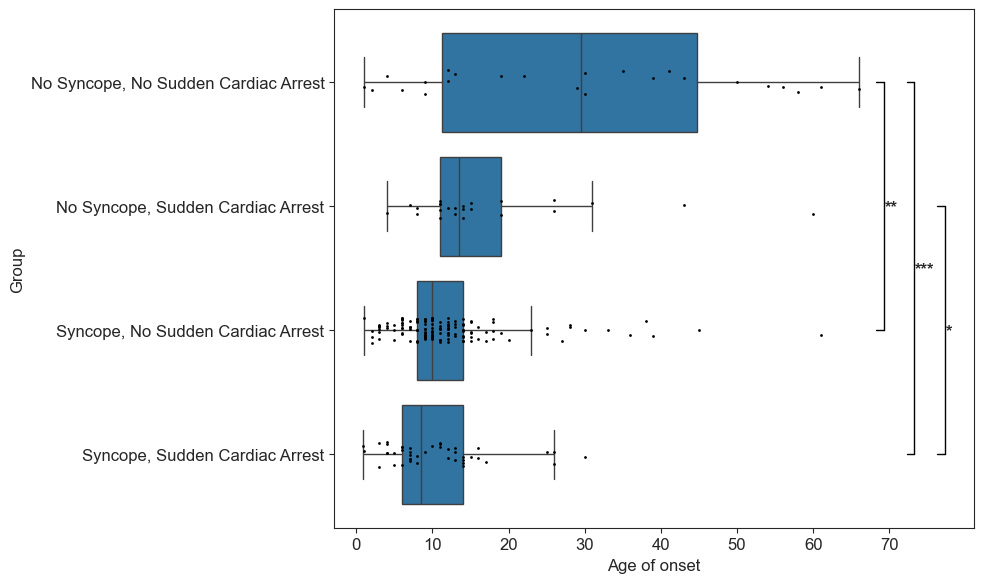

In [48]:
order_ssca = [
    "No Syncope, No Sudden Cardiac Arrest",
    "No Syncope, Sudden Cardiac Arrest",
    "Syncope, No Sudden Cardiac Arrest",
    "Syncope, Sudden Cardiac Arrest"
]

with plt.rc_context({
    "font.size": 12,
    "figure.figsize": (10, 6),
}):
    # boxplots
    sns.boxplot(
        data=data_sny_sca_age,
        y="group_ssca",
        x="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
        fliersize=0,
        order=order_ssca,

    )
    sns.stripplot(
        data=data_sny_sca_age,
        y="group_ssca",
        x="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
        color="black",
        size=2,
        order=order_ssca
    )
    # plt.xticks(rotation=45)
    plt.xlabel("Age of onset")
    plt.ylabel("Group")

    max_x = data_sny_sca_age[
                "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].max() + .05 * \
            data_sny_sca_age[
                "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].max()
    prev_x_lim = plt.xlim()

    added_stars = set()
    # add p-values
    for g1 in posthoc.columns:
        for g2 in posthoc.index:

            star_key = tuple(sorted([g1, g2]))

            if star_key in added_stars:
                continue

            added_stars.add(star_key)

            if g1 == g2:
                continue
            pvalue = posthoc.loc[g2, g1]
            pvalue_str = convert_pvalue_to_asterisks(pvalue)

            if not pvalue_str:
                print("Skipping", g1, g2)
                continue

            print(f"Adding {pvalue_str} between {g1} and {g2}")

            y_pos = order_ssca.index(g1)
            y_pos2 = order_ssca.index(g2)

            # draw line
            ax = plt.gca()

            ax.plot(
                [max_x, max_x],
                [y_pos, y_pos2],
                color="black",
                lw=1
            )
            ax.plot(
                [max_x, max_x - 1],
                [y_pos, y_pos],
                color="black",
                lw=1
            )
            ax.plot(
                [max_x, max_x - 1],
                [y_pos2, y_pos2],
                color="black",
                lw=1
            )
            star_loc = (y_pos + y_pos2) / 2

            ax.text(
                max_x + 0.1,
                star_loc,
                pvalue_str,
                ha="left",
                va="center",
                fontsize=12,
                fontweight="bold"
            )

            max_x += 4

    # only allow x ticks to go up to previous x limit 
    plt.xticks(np.arange(0, prev_x_lim[1] + 1, 10))

    plt.tight_layout()

    plt.savefig(
        fig_dir / "reviewer2.question1.age_vs_syncope_and_sudden_cardiac_arrest.png")

    plt.show()